<a href="https://colab.research.google.com/github/RaihanFazzaufaR/22_RaihanFazzaufaRasendriya/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Gamma Correction


Gamma Correction pada citra 
--------------------------------
Masukkan nilai Gamma: 3


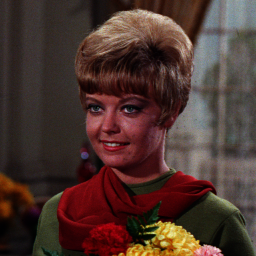

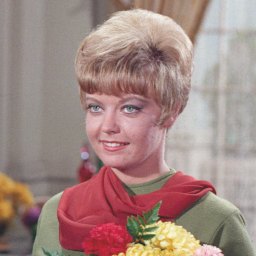

In [3]:
print('Gamma Correction pada citra ')
print('--------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error not a number')

img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_edit = img.copy()

def gamma_correction(img, gamma):
  inv_gamma = 1/gamma

  table = np.array([((i/255) ** inv_gamma) * 255 for i in np.arange(0, 256)])

  correct_img = cv.LUT(img, table)

  return correct_img

corrected_img = gamma_correction(img_edit, gamma)

cv2_imshow(img)
cv2_imshow(corrected_img)

# Image Depth

Gambar Asli:


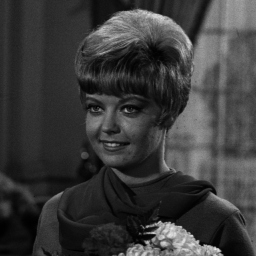

Gambar setelah kuantisasi 2-bit:


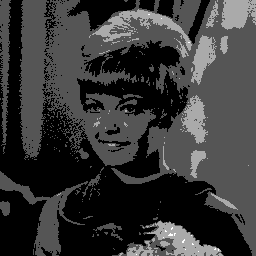

In [4]:
bit_depth = 2
level = 255 / (pow(2, bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)

if original is None:
    print(f"Error: Gambar tidak ditemukan di {image_path}. Pastikan path benar.")
else:
    depth_image = np.zeros(original.shape, original.dtype)

    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            depth_image[i, j] = np.round(original[i, j] / level) * level


    print("Gambar Asli:")
    cv2_imshow(original)

    print(f"Gambar setelah kuantisasi {bit_depth}-bit:")
    cv2_imshow(depth_image)

# Average Denoising

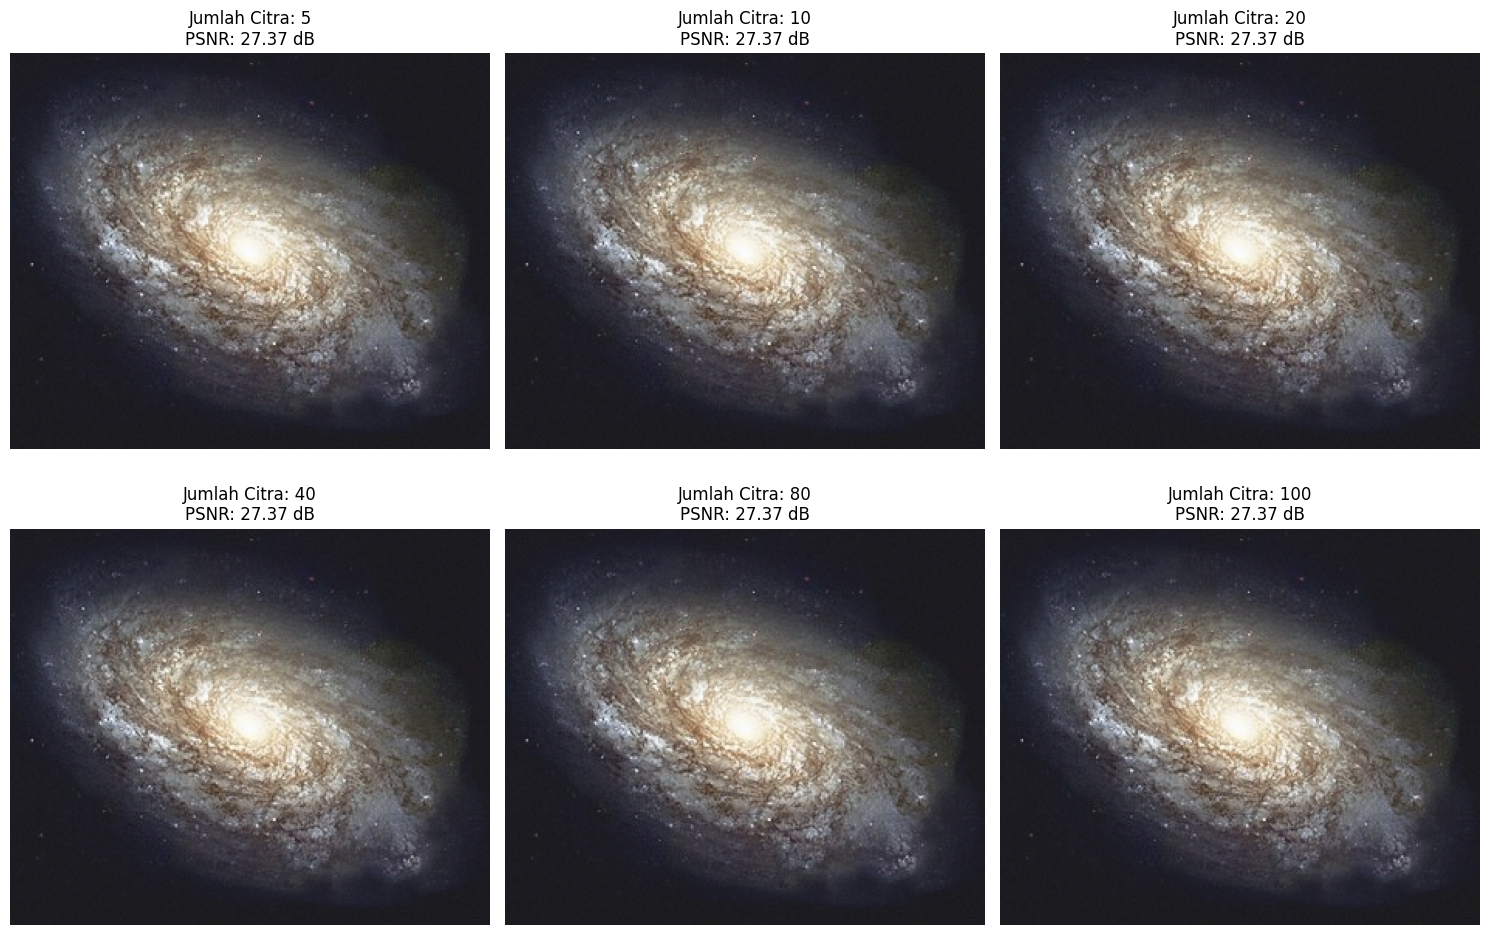

In [5]:
import glob
cv_img = []

for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:  # Jika MSE = 0, artinya citra tanpa noise, PSNR tak terhingga
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Load citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# Daftar jumlah citra yang ingin digunakan
jumlah_citra_list = [5, 10, 20, 40, 80, 100]

# Siapkan plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()  # Ravel untuk mengakses subplot secara flat array

for i, jumlah in enumerate(jumlah_citra_list):
    average_img = np.mean(cv_img, axis=0).astype(np.uint8)
    psnr_value = calculate_psnr(original_img, average_img)

    average_img_rgb = cv.cvtColor(average_img, cv.COLOR_BGR2RGB)
    axes[i].imshow(average_img_rgb)
    axes[i].set_title(f'Jumlah Citra: {jumlah}\nPSNR: {psnr_value:.2f} dB')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Image Masking

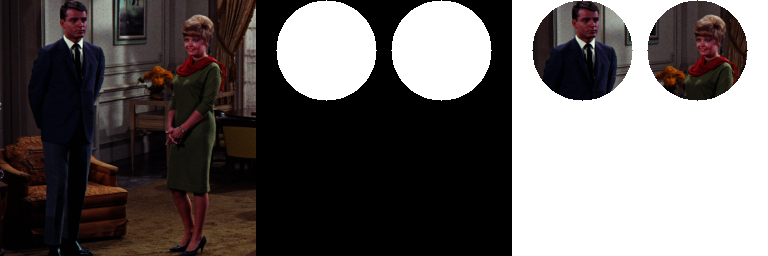

In [6]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')

# Membuat mask dengan bentuk lingkaran
mask = np.zeros(original.shape, original.dtype)  # mask hanya di satu channel (grayscale)
cv.circle(mask, (70,50), 50, (255,255,255), -1)
cv.circle(mask, (185,50), 50, (255,255,255), -1)

# Menerapkan mask pada gambar
masked_image = cv.bitwise_and(original, mask)
masked_image[np.all(masked_image == [0, 0, 0], axis=-1)] = [255, 255, 255]

# Menampilkan gambar asli, mask, dan gambar yang di-mask
final_frame = cv.hconcat([original, mask, masked_image])

# Menampilkan hasilnya
cv2_imshow(final_frame)

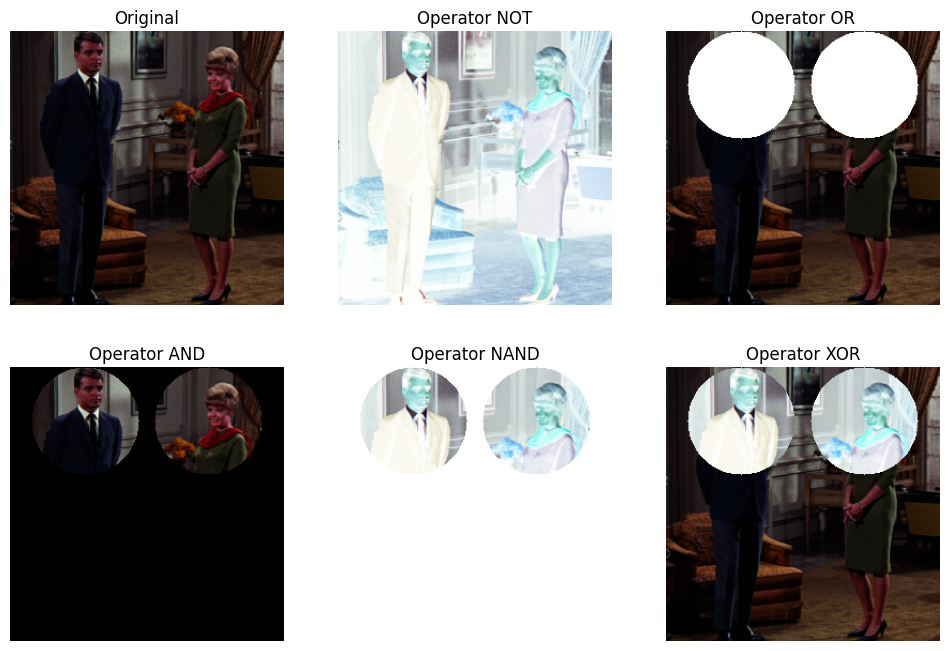

In [7]:
masked_image_not = cv.bitwise_not(original)
masked_image_or = cv.bitwise_or(original, mask)
masked_image_and = cv.bitwise_and(original, mask)
masked_image_nand = cv.bitwise_not(masked_image_and)
masked_image_xor = cv.bitwise_xor(original, mask)

def show_images_with_titles(images, titles):
    plt.figure(figsize=(12, 8))
    for i in range(len(images)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')

    plt.show()

images = [original, masked_image_not, masked_image_or, masked_image_and, masked_image_nand, masked_image_xor]
titles = ['Original', 'Operator NOT', 'Operator OR', 'Operator AND', 'Operator NAND', 'Operator XOR']

show_images_with_titles(images, titles)

# Tugas


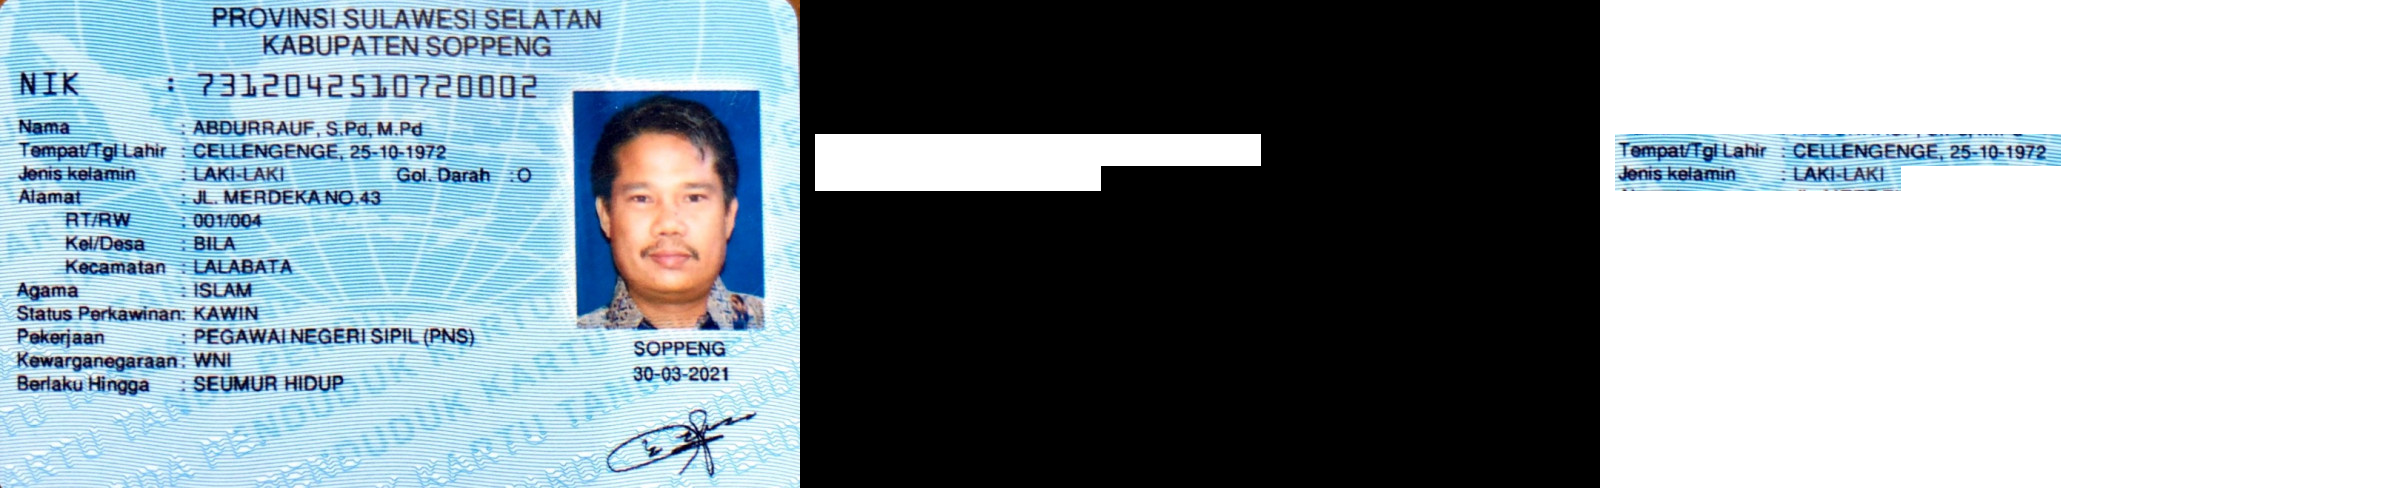

In [9]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg.jpg')

mask = np.zeros(original.shape, original.dtype)
cv.rectangle(mask, (15, 134), (460, 165), (255, 255, 255), -1)
cv.rectangle(mask, (15, 190), (300, 160), (255, 255, 255), -1)

masked_image = cv.bitwise_and(original, mask)
masked_image[np.all(masked_image == [0, 0, 0], axis=-1)] = [255, 255, 255]

final_frame = cv.hconcat([original, mask, masked_image])

cv2_imshow(final_frame)